# Libraries

In [50]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Importing Data

In [51]:
df=pd.read_csv("heart.csv")
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Graphical Representation of Data

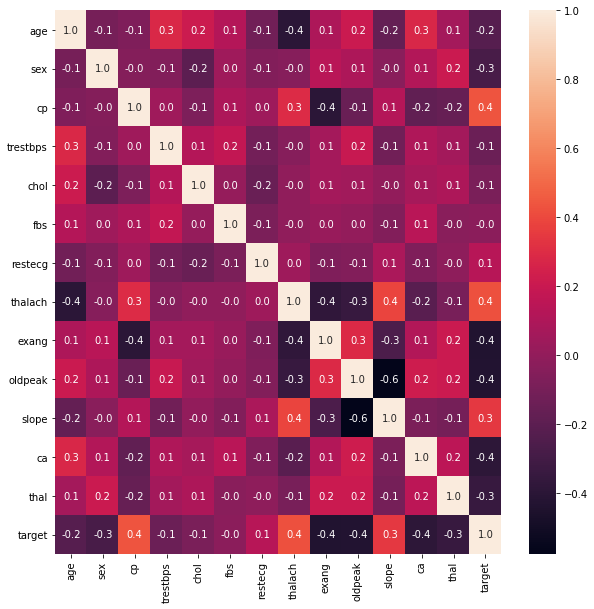

In [52]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.1f')
plt.show()

In [53]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

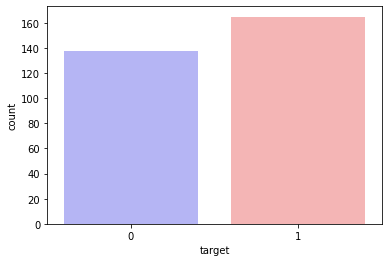

In [54]:
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

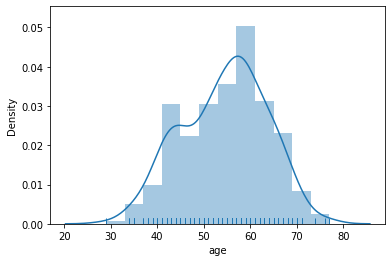

In [55]:
sns.distplot(df['age'],rug=True)
plt.show()

In [56]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

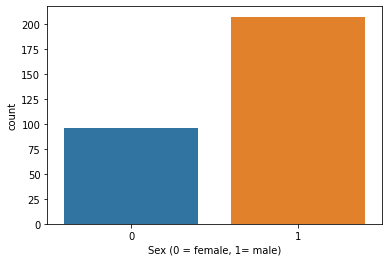

In [57]:
sns.countplot(x='sex', data=df)
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

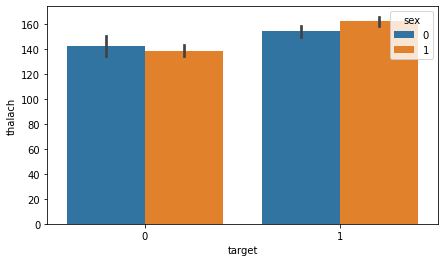

In [58]:
plt.figure(num=None, figsize=(7, 4))

sns.barplot(y='thalach', x='target',hue='sex', data=df)
plt.show()

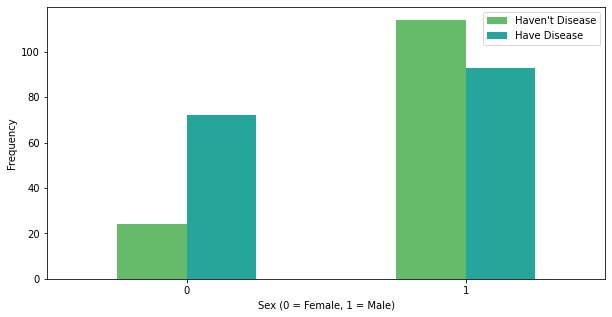

In [59]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(10,5),color=['#66bb6a','#26a69a' ])
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

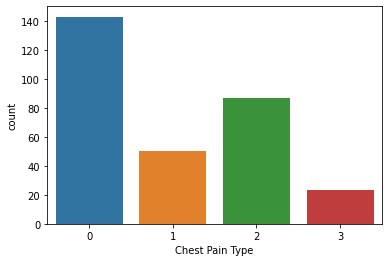

In [60]:
sns.countplot(x='cp', data=df)
plt.xlabel('Chest Pain Type')
plt.show()

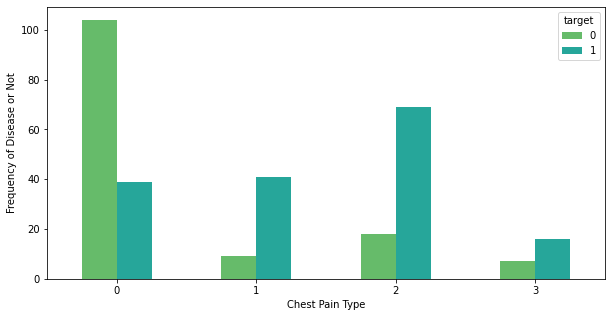

In [61]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,5),color=['#66bb6a','#26a69a' ])
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

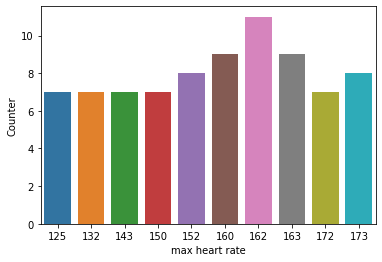

In [62]:
sns.barplot(x=df.thalach.value_counts()[:10].index,y=df.thalach.value_counts()[:10].values)
plt.xlabel('max heart rate')
plt.ylabel('Counter')
plt.show()

# Dummie Variables

In [63]:
chestPain=pd.get_dummies(df['cp'],prefix='cp',drop_first=True)
df=pd.concat([df,chestPain],axis=1)
df.drop(['cp'],axis=1,inplace=True)
sp=pd.get_dummies(df['slope'],prefix='slope')
th=pd.get_dummies(df['thal'],prefix='thal')
frames=[df,sp,th]
df=pd.concat(frames,axis=1)
df.drop(['slope','thal'],axis=1,inplace=True)

In [64]:
df.head(5)

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,1,0,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,1,0,0,0,0,1,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,1,0
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,1,0
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,1,0


# Spliting Data 

In [65]:
X = df.drop(['target'], axis = 1)
y = df.target.values

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [67]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

# Multiple Algorithms

In [68]:
#LogisticRegression
logiReg=LogisticRegression(random_state=0)
logiReg.fit(X_train,y_train)
logiRegPred=logiReg.predict(X_test)
logiRegAcu=accuracy_score(y_test, logiRegPred)

#SVM classifier
svc=SVC(kernel='linear',random_state=0)
svc.fit(X_train,y_train)
svcPred=svc.predict(X_test)
svcAcu=accuracy_score(y_test, svcPred)

#Bayes
bayes=GaussianNB()
bayes.fit(X_train,y_train)
bayesPred=bayes.predict(X_test)
bayesAcu=accuracy_score(bayesPred,y_test)

#SVM regressor
svcReg=SVC(kernel='rbf')
svcReg.fit(X_train,y_train)
svcRedPred=svcReg.predict(X_test)
svcRedAcu=accuracy_score(y_test, svcRedPred)

#RandomForest
randomForest=RandomForestClassifier(n_estimators=20,criterion='entropy',random_state=0)
randomForest.fit(X_train,y_train)
randomForestPred=randomForest.predict(X_test)
randomForestAcu=accuracy_score(randomForestPred,y_test)

# DecisionTree Classifier
dTree=DecisionTreeClassifier(criterion='entropy',random_state=1)
dTree.fit(X_train,y_train)
dTreePred=dTree.predict(X_test)
dTreeAcu=accuracy_score(dTreePred,y_test)

#KNN
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
knnPred=knn.predict(X_test)
knnAcu=accuracy_score(knnPred,y_test)


# confusion matrix

In [69]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report

In [70]:
lr_conf_matrix = confusion_matrix(y_test, logiRegPred)
svc_conf_matrix = confusion_matrix(y_test, svcPred)
svcReg_conf_matrix = confusion_matrix(y_test, svcRedPred)
knn_conf_matrix = confusion_matrix(y_test, knnPred)
dTree_conf_matrix = confusion_matrix(y_test, dTreePred)
randomForest_conf_matrix = confusion_matrix(y_test, randomForestPred)
bayes_conf_matrix = confusion_matrix(y_test, bayesPred)

In [71]:
print(f'Logistic Regression\n{lr_conf_matrix}')
print(f'SVC\n{svc_conf_matrix}')
print(f'SVC regression\n{svcReg_conf_matrix}')
print(f'KNN\n{knn_conf_matrix}')
print(f'Decision Tree\n{dTree_conf_matrix}')
print(f'Random Forest{randomForest_conf_matrix}')
print(f'Bayes\n{bayes_conf_matrix}')

Logistic Regression
[[21  6]
 [ 3 31]]
SVC
[[23  4]
 [ 5 29]]
SVC regression
[[23  4]
 [ 4 30]]
KNN
[[23  4]
 [ 4 30]]
Decision Tree
[[25  2]
 [10 24]]
Random Forest[[25  2]
 [ 7 27]]
Bayes
[[25  2]
 [ 5 29]]


# Accuracy Score

In [72]:
print('LogisticRegression Accuracy:\t',logiRegAcu)
print('SVM Regressor Accuracy:\t\t',svcRedAcu)
print('RandomForest Accuracy:\t\t',randomForestAcu)
print('DecisionTree Accuracy:\t\t',dTreeAcu)
print('KNN Accuracy:\t\t\t',knnAcu)
print('SVM Classifier Accuracy:\t',svcAcu)
print('Bayes Accuracy:\t\t\t',bayesAcu)

LogisticRegression Accuracy:	 0.8524590163934426
SVM Regressor Accuracy:		 0.8688524590163934
RandomForest Accuracy:		 0.8524590163934426
DecisionTree Accuracy:		 0.8032786885245902
KNN Accuracy:			 0.8688524590163934
SVM Classifier Accuracy:	 0.8524590163934426
Bayes Accuracy:			 0.8852459016393442


# Comparison Graph

Text(0.5, 1.0, 'Model Accracy')

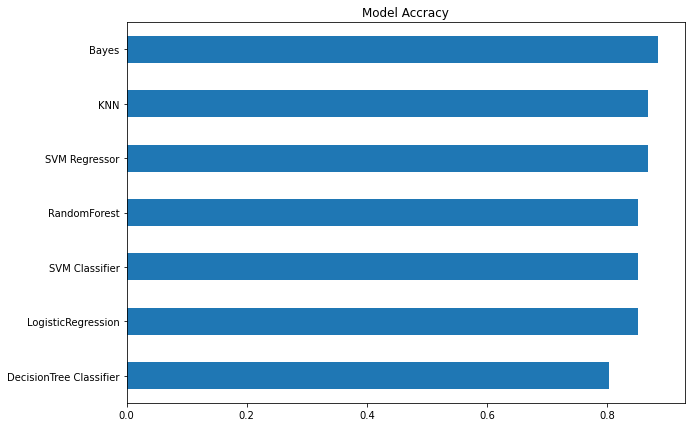

In [73]:
modelAccuracy = pd.Series(data=[logiRegAcu,svcAcu,bayesAcu,svcRedAcu,randomForestAcu,dTreeAcu,knnAcu], 
index=['LogisticRegression','SVM Classifier','Bayes','SVM Regressor',
'RandomForest','DecisionTree Classifier','KNN'])
fig= plt.figure(figsize=(10,7))
modelAccuracy.sort_values().plot.barh()
plt.title('Model Accracy')